In [1]:
import rasterio as rio
import numpy as np
from rasterio.plot import show
import rasterio.plot
import pyproj
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [6]:
# open file

# filepath = 'http://landsat-pds.s3.amazonaws.com/c1/L8/042/034/LC08_L1TP_042034_20170616_20170629_01_T1/LC08_L1TP_042034_20170616_20170629_01_T1_B4.TIF'
# with rio.open(filepath) as src:
#     print(src.profile)
    
# dimg = rio.open('../data/SatImage/LC08_L1TP_042034_20170616_20170629_01_T1_B4.tiff')
# print(dimg.profile)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7821, 'height': 7951, 'count': 1, 'crs': CRS.from_dict(init='epsg:32611'), 'transform': Affine(30.0, 0.0, 204285.0,
       0.0, -30.0, 4268115.0), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}


In [11]:
filepath = 'http://landsat-pds.s3.amazonaws.com/c1/L8/042/034/LC08_L1TP_042034_20170616_20170629_01_T1/LC08_L1TP_042034_20170616_20170629_01_T1_B4.TIF'

with rio.open(filepath) as file:
    dimg = file.overviews(1)
    oview = dimg[-1]
    print('Decimation factor= {}'.format(oview))
    thumbnail = file.read(1, out_shape=(1, int(file.height // oview), int(file.width // oview)))

    thumbnail = thumbnail.astype('f4')
    thumbnail[thumbnail==0] = np.nan

Decimation factor= 81


Text(0, 0.5, 'Row #')

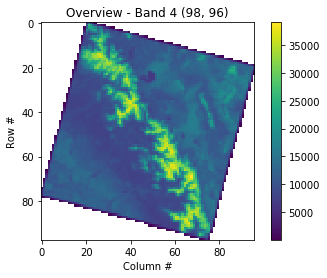

In [14]:
plt.imshow(thumbnail)
plt.colorbar()
plt.title('Overview - Band 4 {}'.format(thumbnail.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')

In [15]:
dimg

[3, 9, 27, 81]

In [16]:
oview

81

In [13]:
show(file)

RasterioIOError: Dataset is closed: http://landsat-pds.s3.amazonaws.com/c1/L8/042/034/LC08_L1TP_042034_20170616_20170629_01_T1/LC08_L1TP_042034_20170616_20170629_01_T1_B4.TIF

In [ ]:
# read all the red
red = thumbnail.read(4)

In [ ]:
# read the near-infrared
nir = dimg.read(5)

In [ ]:
# display the red array
red

In [ ]:
# display the near-infrared array
nir

In [ ]:
# display nir
show(nir)

In [ ]:
# display red
show(red)

In [ ]:
# display nir type
type(nir)

In [ ]:
# display red type
type(red)

In [ ]:
# red = red.astype(float)

In [ ]:
# nir = nir.astype(float)

In [ ]:
# nir

In [ ]:
# red

In [ ]:
# ignore warning, allowing to divide by 0
np.seterr(divide='ignore', invalid='ignore')

In [ ]:
ndvi = np.empty(dimg.shape, dtype=rio.float32)

In [ ]:
check = np.logical_or ( red > 0, nir > 0 )

In [ ]:
ndvi = np.where ( check,  (nir - red ) / ( nir + red ), -999 )

In [ ]:
ndvi

In [ ]:
ndvi.mean()

In [ ]:
ndvi.std()

In [ ]:
show(ndvi, cmap='summer')